Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Input data into python

In [2]:
sales_train=pd.read_csv(r"D:\Studies\ML AI-ICT\Intermediate accessment\train_v9rqX0R.csv")
sales_test=pd.read_csv(r"D:\Studies\ML AI-ICT\Intermediate accessment\test_AbJTz2l.csv")

Displaying the 1st 5 rows of train dataset

In [3]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Dimension of the train dataset

In [4]:
sales_train.shape

(8523, 12)

Displaying the 1st 5 rows of test dataset

In [5]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Dimension of the test dataset

In [6]:
sales_test.shape

(5681, 11)

We can see that the train dataset has 8523 x 12 dimnension and test dataset has 5681 x 11 dimension . 

The target column is not there in test dataset , that is the difference 

## Basic Information of the dataset

In [7]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can see that the train dataset has some missing values in columns Item_weight and Outlet_Size . 

The features are of following data types
7 object type features and 5 numerical type features 

In [8]:
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We can see that the test dataset has some missing values in columns Item_weight and Outlet_Size .

The features are of following data types 7 object type features and 4 numerical type features(target variable not there , hence the difference)

## Basic statistical summary of the Features

In [9]:
sales_train.describe().style.background_gradient(cmap="YlOrRd")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here the Item weight has range from 4.55 to 21.35 

Item visiblity has range from 0 to 0.328391 .This means item is not kept visible which needs to be analysed

Item_MRP is ranging from 31.29 to 266.88

Outlet establishment year is from 1985 to 2009

Item outlet sales which is the target variable is from 33.29 to 13086.96 


In [10]:
sales_test.describe().style.background_gradient(cmap="YlOrRd")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Here the Item weight has range from 4.55 to 21.35

Item visiblity has range from 0 to 0.3236.This means item is not kept visible which needs to be analysed 

Item_MRP is ranging from 31.99 to 266.58

Outlet establishment year is from 1985 to 2009

THe data in train and test is varying in almost same range 

In [11]:
sales_train.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


From the train data , we can observe following points

Item identifier has 1559 unique values and FDW13 tops the list 

Item_Fat_Content has 5 unique values and Low fat tops the list 

Item type has 16 unique values and Fruits and Vegetables tops the list 

Outlet_Identifier has 10 unique values and OUT027 tops the list 

Outlet _Size has missing values and 3 unique values. Medium tops the list 

Outlet_Location_Type has 3 unqiue values and Tier3 tops the list

Outlet_Type has 4 unique values and Supermarket Type1 tops the list 

In [12]:
sales_test.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


From the test data , we can observe following points

Item identifier has 1543 unique values and DRF48 tops the list

Item_Fat_Content has 5 unique values and Low fat tops the list

Item type has 16 unique values and Snacks Foods tops the list

Outlet_Identifier has 10 unique values and OUT027 tops the list

Outlet _Size has missing values and 3 unique values. Medium tops the list

Outlet_Location_Type has 3 unqiue values and Tier3 tops the list

Outlet_Type has 4 unique values and Supermarket Type1 tops the list

## Check for the duplicates

In [13]:
sales_train[sales_train.duplicated()].shape

(0, 12)

In [14]:
sales_test[sales_test.duplicated()].shape

(0, 11)

No Duplicates found in both train and test dataset

## Check for missing values

In [15]:
sales_train.isnull().sum().to_frame().style.bar(color="red")

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [16]:
sales_test.isnull().sum().to_frame().style.bar(color="red")

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


Here we can see that the missing values are there and we need to treat them appropriately

### Exploratory Data analysis

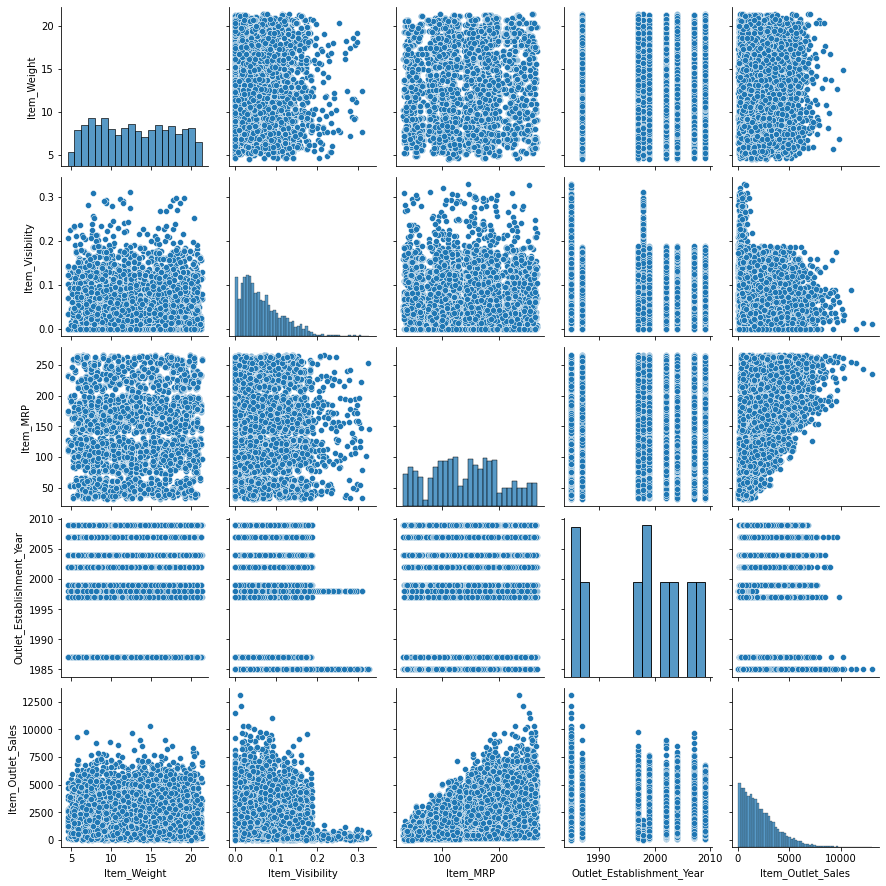

In [17]:
sns.pairplot(sales_train)

- Here item_visibility and Item sales are right skewed and median will be greater than mean (seen from describe function)

- Item weight is not skewed , so we can use mean function itself or filling the missing values

- Item_outlet_sales is less where item_visibility is less and item_MRP is high. SO there is corelation for these two variables with target

- Here item weight and Item outlet sales have less correlation 


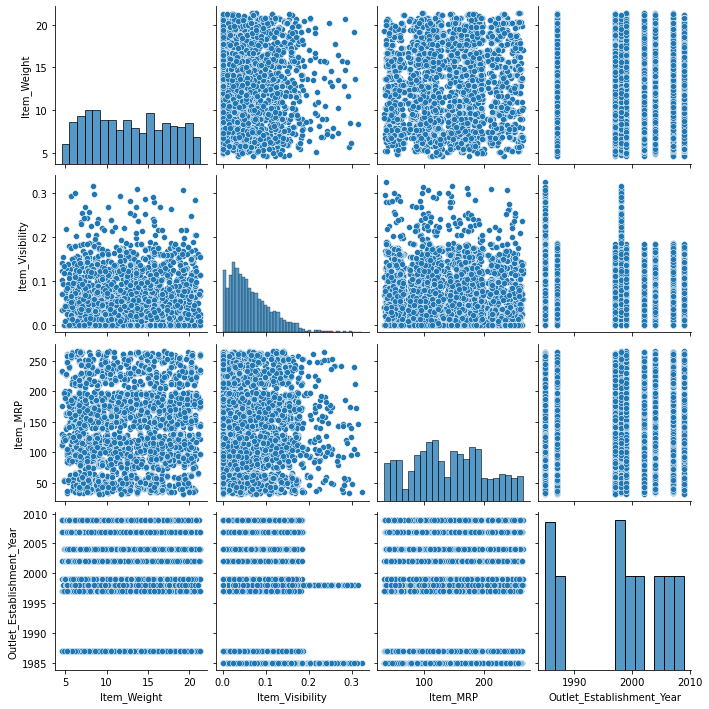

In [18]:
sns.pairplot(sales_test)

Here item_visibility is right skewed 

Item weight is not skewed , so we can use mean function itself or filling the missing values

In [19]:
columns_obj=sales_train.select_dtypes(include="object").columns
columns_obj

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Distribution of  Item_Identifier


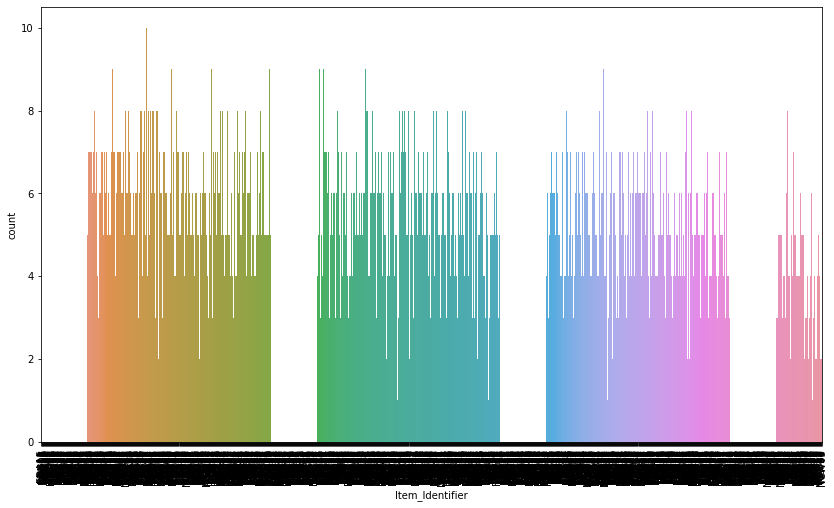

Distribution of  Item_Fat_Content


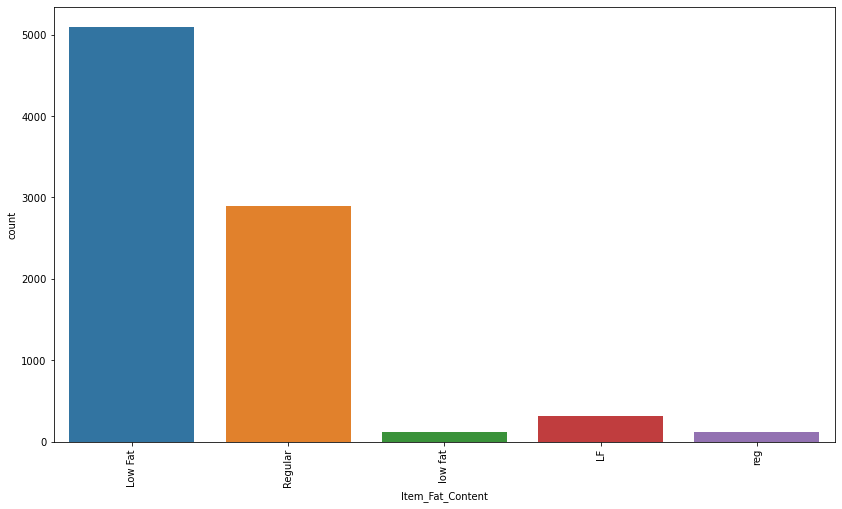

Distribution of  Item_Type


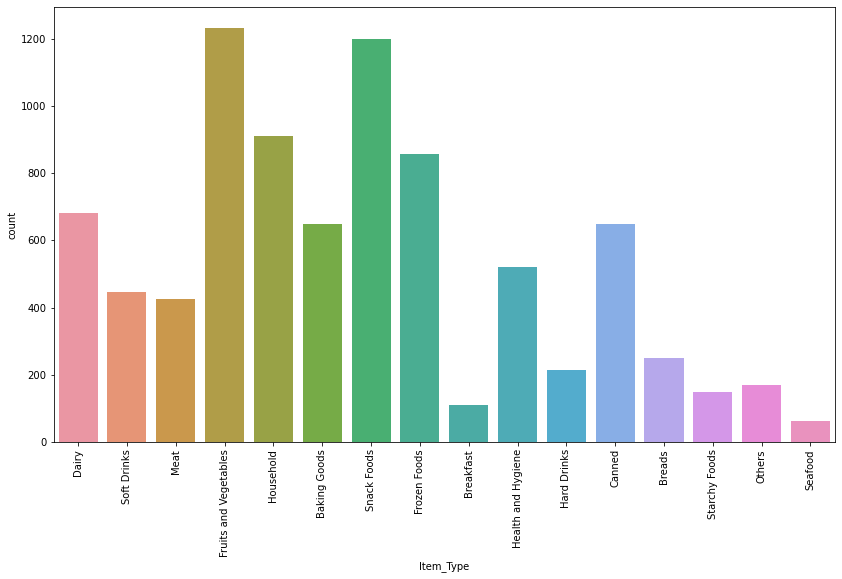

Distribution of  Outlet_Identifier


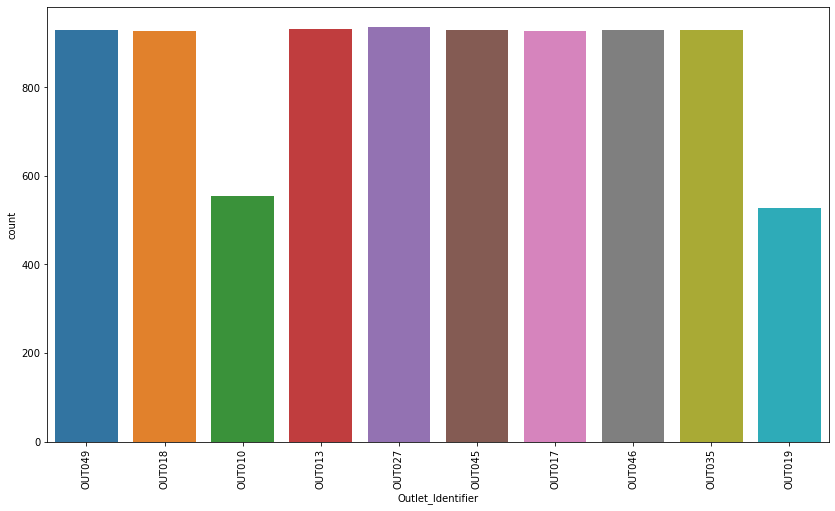

Distribution of  Outlet_Size


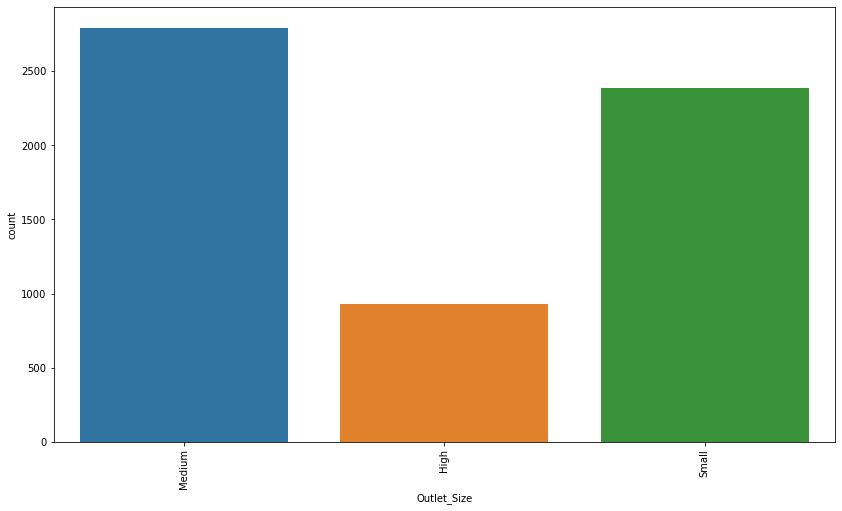

Distribution of  Outlet_Location_Type


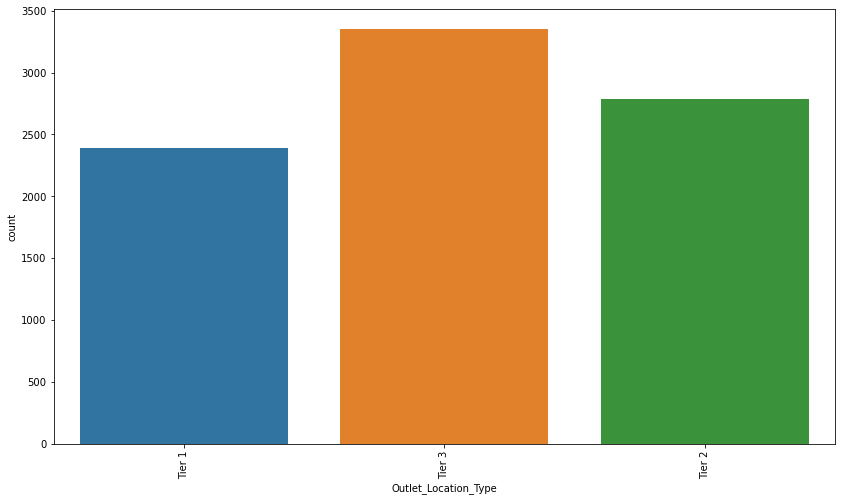

Distribution of  Outlet_Type


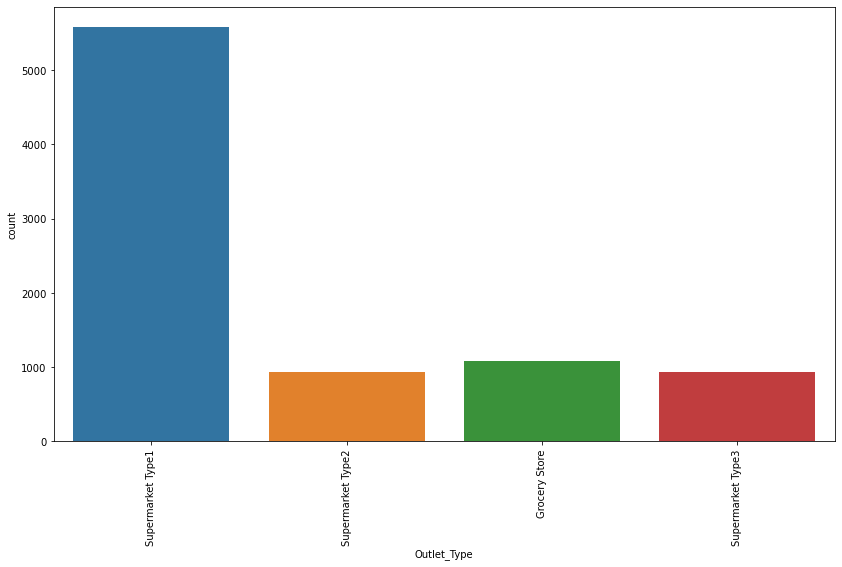

In [20]:
for i in columns_obj:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=sales_train[i])
    print("Distribution of ",i )
    plt.xticks(rotation=90)
    plt.show()

In Train datatype following points can be observed 
- Five categories are there , but it is different typo of Low Fat and Regular , so it can be classified into two categories
- Item type , Fruits and Vegetables are higher followed by snacks fodd and Frozen food
- OUT010 and OUT019 are less in number and all others are in almost equal numbers
- Outlet size medium is higher followed by SMall and High 
- Outlet location , tier 3 is higher followed by tier 2 and Tier 1
- Outlet type , supermarket type1 is of more number and type 2 and 3 are almost equal with grocery slightly higher 


Distribution of  Item_Identifier


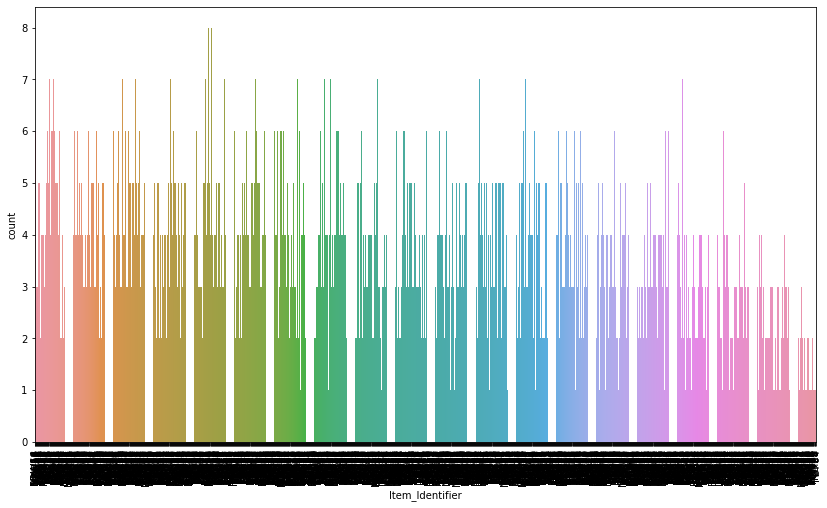

Distribution of  Item_Fat_Content


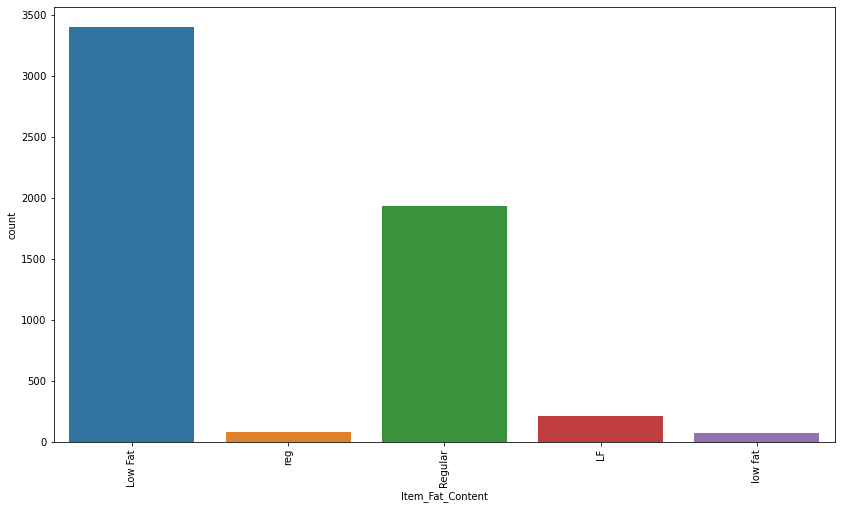

Distribution of  Item_Type


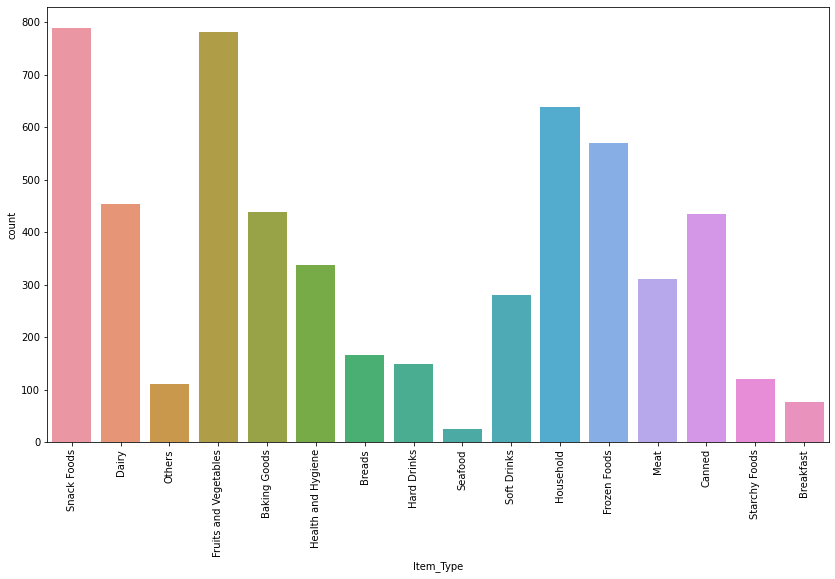

Distribution of  Outlet_Identifier


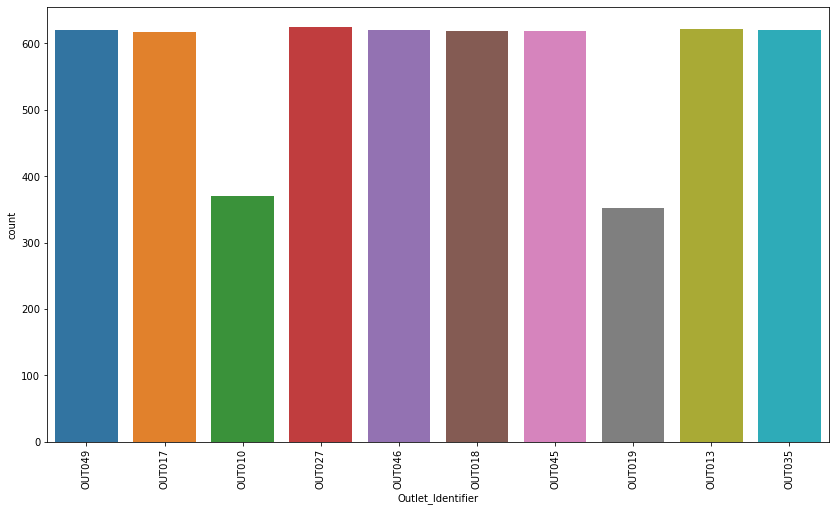

Distribution of  Outlet_Size


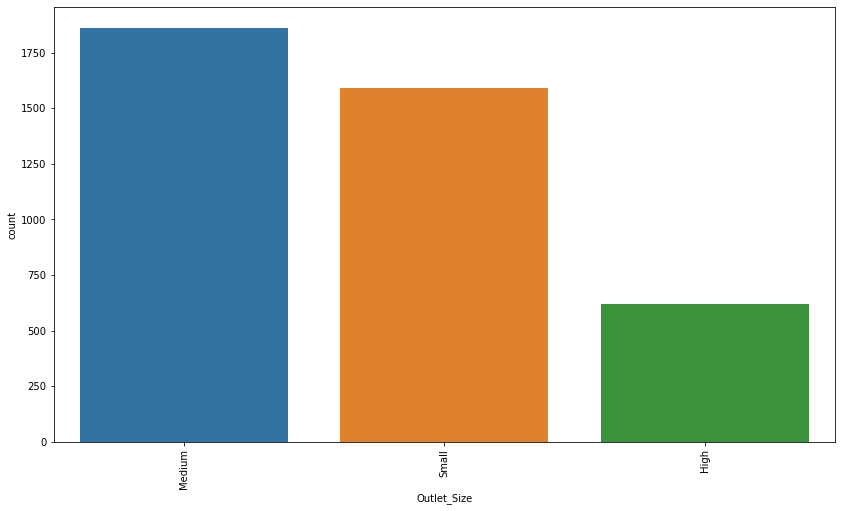

Distribution of  Outlet_Location_Type


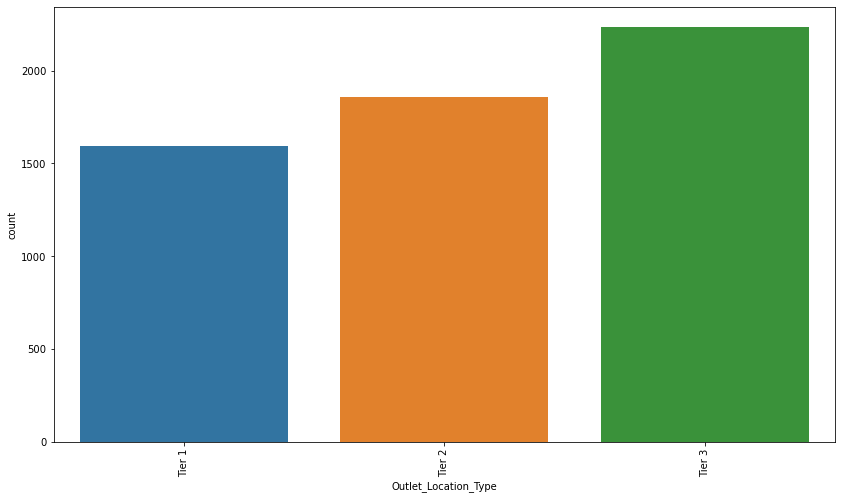

Distribution of  Outlet_Type


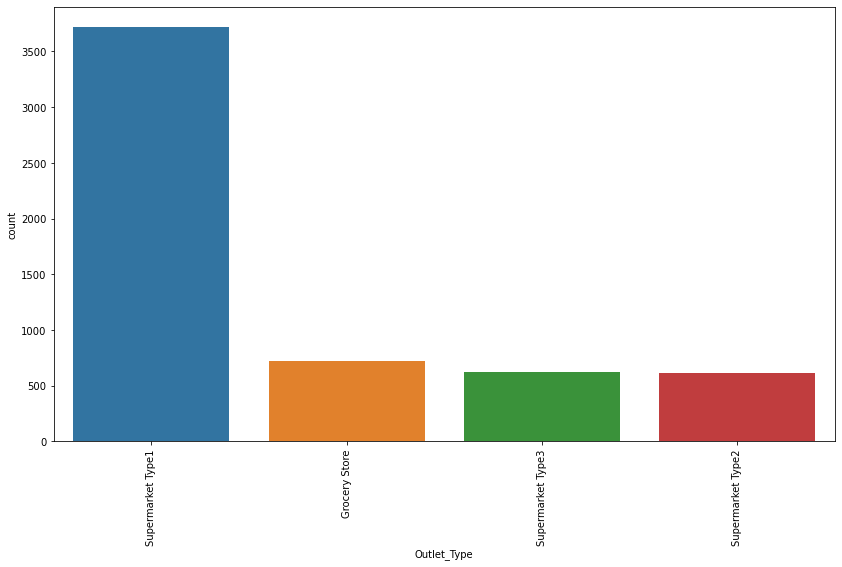

In [21]:
for i in columns_obj:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=sales_test[i])
    print("Distribution of ",i )
    plt.xticks(rotation=90)
    plt.show()

In Test datatype following points can be observed

- Five categories are there , but it is different typo of Low Fat and Regular , so it can be classified into two categories
- Item type , snacks food are higher followed by Fruits and vegetables and HOusehold
- OUT010 and OUT019 are less in number and all others are in almost equal numbers
- Outlet size medium is higher followed by SMall and High
- Outlet location , tier 3 is higher followed by tier 2 and Tier 1
- Outlet type , supermarket type1 is of more number and type 2 and 3 are almost equal with grocery slightly higher

In [22]:
sales_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':"Low Fat"},inplace=True)
sales_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':"Low Fat"},inplace=True)

Distribution of  Item_Fat_Content with respect to Item_Outlet_Sales


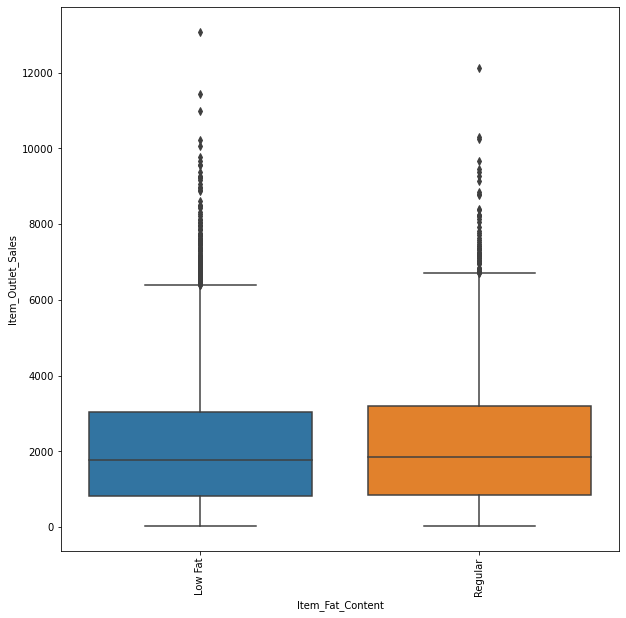

Distribution of  Item_Type with respect to Item_Outlet_Sales


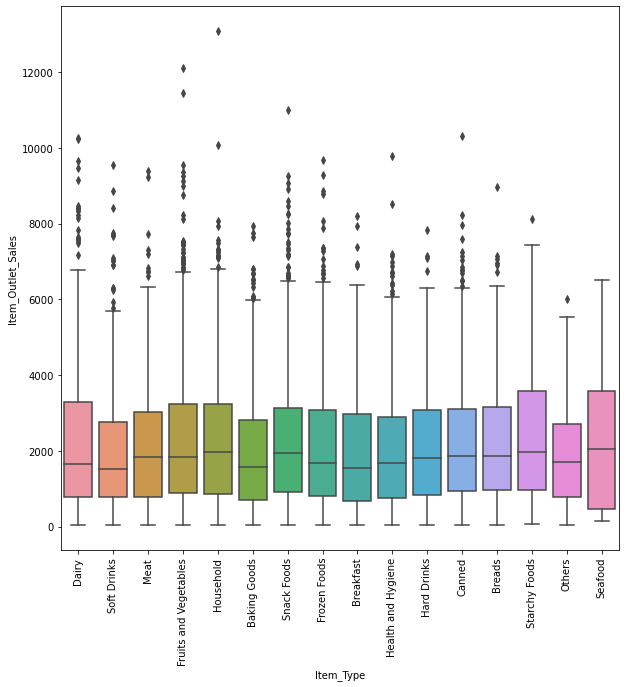

Distribution of  Outlet_Identifier with respect to Item_Outlet_Sales


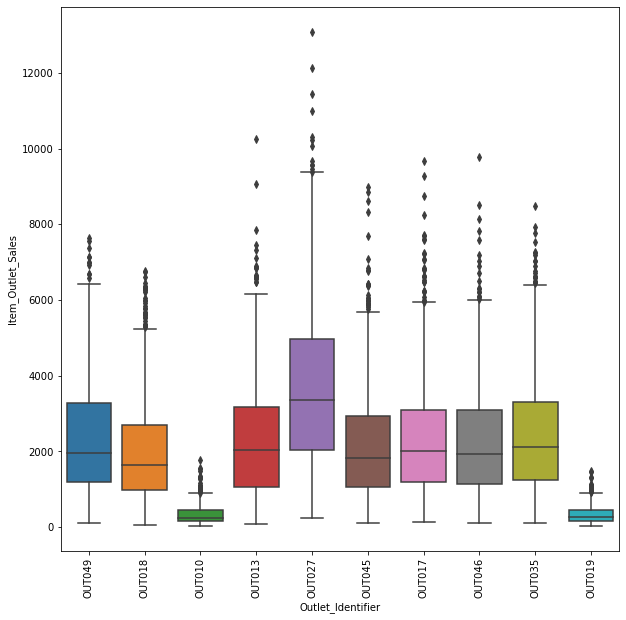

Distribution of  Outlet_Size with respect to Item_Outlet_Sales


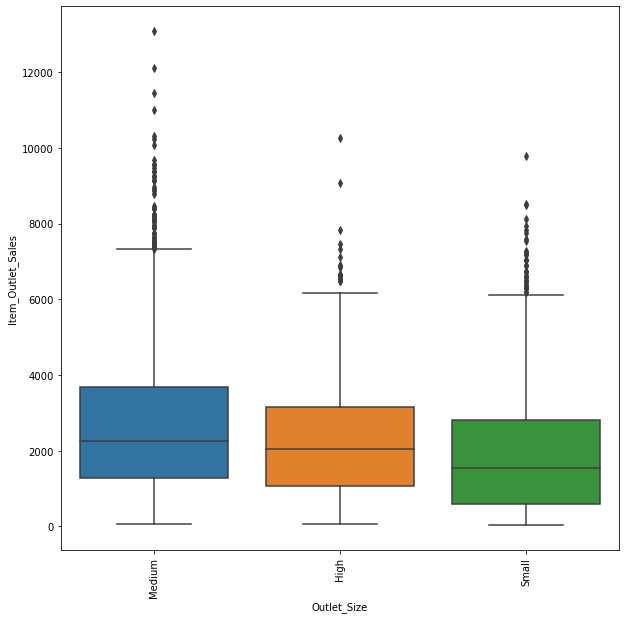

Distribution of  Outlet_Location_Type with respect to Item_Outlet_Sales


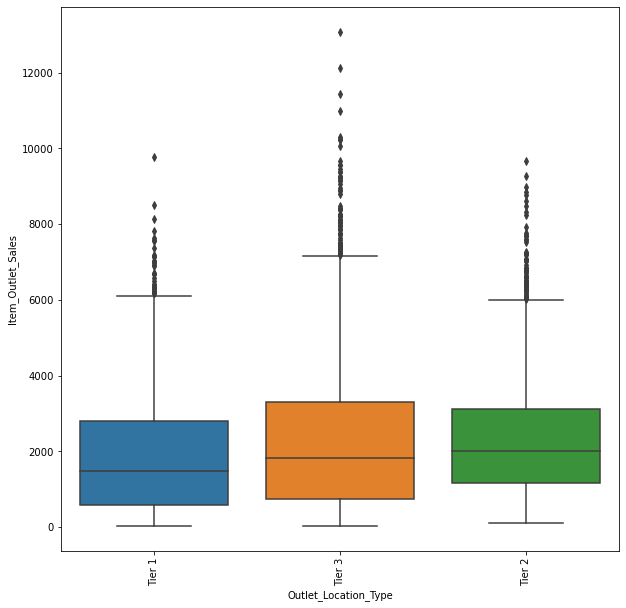

Distribution of  Outlet_Type with respect to Item_Outlet_Sales


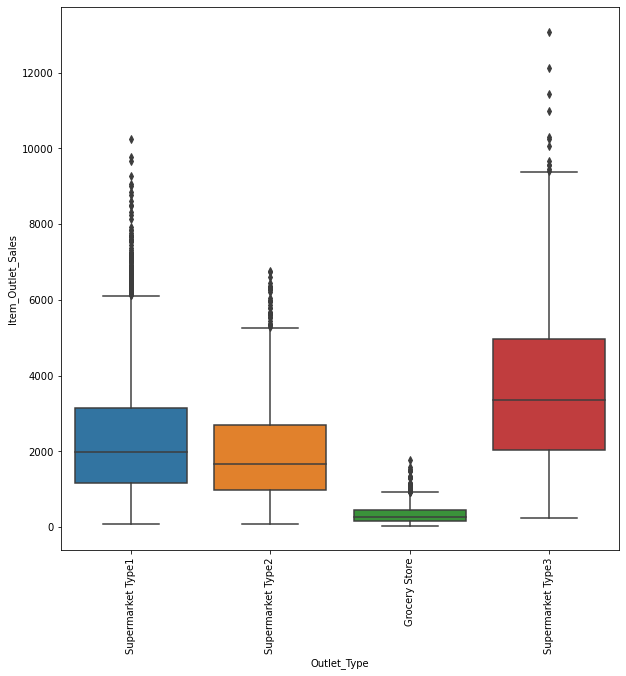

Distribution of  Outlet_Establishment_Year with respect to Item_Outlet_Sales


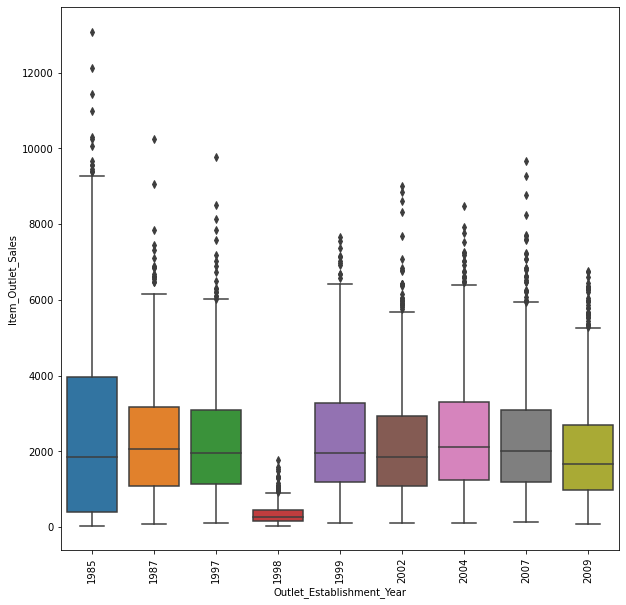

In [23]:
columns2= ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',"Outlet_Establishment_Year"]
for i in columns2:   
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=sales_train[i], y=sales_train["Item_Outlet_Sales"])
    print("Distribution of ",i ,"with respect to Item_Outlet_Sales")
    plt.xticks(rotation=90)
    plt.show()

Following points can be observed from the EDA , 

- Outlet establishment year: shops opened in 1998 have lowest sales , with highest for 1985 and 2004 
- Grocery store have really low sales , followed by type 2 . Type 3 is having maximum sales .Type 1 have lesser sales evenr when number is high 
- Tier 3 have maximum sales followed by Tier 1 and 2
- Medium type have maximum sales and their number is high 
- OUT027 have maximum sales
- Starchy food is having highest salesfollowed by sea food . Soft drinks , baking good have comapritively less sales
- Fat content , not much relation with item sales

<Figure size 720x432 with 0 Axes>

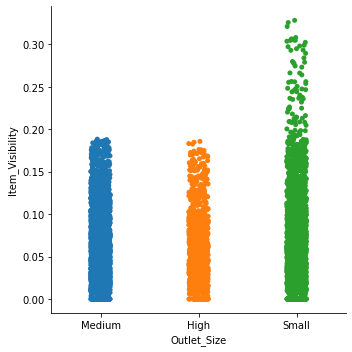

In [24]:
plt.figure(figsize=(10,6))
sns.catplot(x = 'Outlet_Size',y = 'Item_Visibility',data=sales_train)
plt.show()

Smallest Stores provide the most visibility to products.

<Figure size 720x432 with 0 Axes>

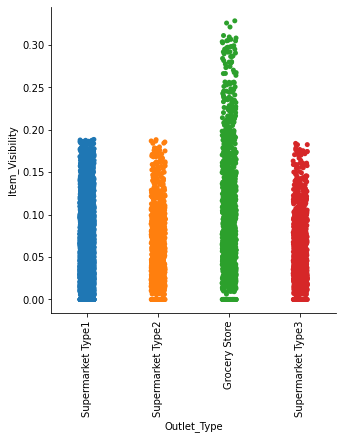

In [25]:
plt.figure(figsize=(10,6))
sns.catplot(x = 'Outlet_Type',y = 'Item_Visibility',data=sales_train)
plt.xticks(rotation=90)
plt.show()

Products are most visible in grocery stores rather than any other super markets.

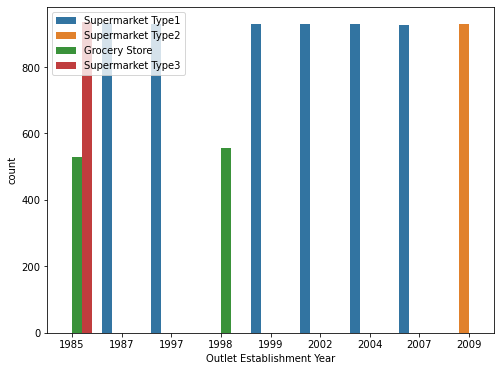

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Outlet_Establishment_Year',hue = 'Outlet_Type',data=sales_train)
plt.xlabel('Outlet Establishment Year')
plt.legend(loc = 'best')
plt.show()

Supermarket type 2 was build much later while grocery stores and supermarket Type1 and Type3 are the oldest outlet type.

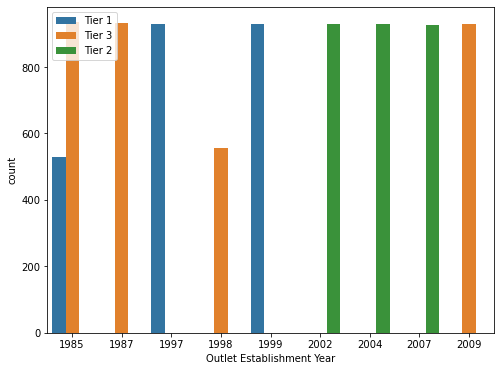

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Outlet_Establishment_Year',hue = 'Outlet_Location_Type',data=sales_train)
plt.xlabel('Outlet Establishment Year')
plt.legend(loc = 'best')
plt.show()

In Tier1 and Tier3 cities outlets were established in 1985 whereas tier2 got outlets after 2000

In [28]:
sales_train['Item_Weight'].fillna(sales_train['Item_Weight'].mean(),inplace=True)
sales_train.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
sales_test['Item_Weight'].fillna(sales_test['Item_Weight'].mean(),inplace=True)
sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [30]:
sales_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
sales_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [32]:
sales_train.loc[sales_train.Outlet_Size.isnull(),['Outlet_Type','Outlet_Location_Type']].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  1855
Grocery Store      Tier 3                   555
dtype: int64

Here we can see that Outlet size null columns have outlet type Supermarket type1 and tier 2 combinations and grocery store Tier 3 combination ones

In [33]:
sales_train.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) value

Tier 2 will have medium size in missing 1 and Tier 3 will be high or medium size shop

But it is difficult to find further find information from above , so proceeding to update using the median method 

In [34]:
map1 = {"Small":1,"Medium":2,"High":3}
sales_train["Outlet_Size"] = sales_train["Outlet_Size"].map(map1)
sales_train["Outlet_Size"] = sales_train["Outlet_Size"].fillna(sales_train["Outlet_Size"].median())

In [35]:
sales_test["Outlet_Size"] = sales_test["Outlet_Size"].map(map1)
sales_test["Outlet_Size"] = sales_test["Outlet_Size"].fillna(sales_test["Outlet_Size"].median())

In [36]:
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(1.000000,'Small')
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(2.000000,'Medium')
sales_train['Outlet_Size'] = sales_train['Outlet_Size'].replace(3.000000,'High')
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].replace(1.000000,'Small')
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].replace(2.000000,'Medium')
sales_test['Outlet_Size'] = sales_test['Outlet_Size'].replace(3.000000,'High')

In [37]:
sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

We have filled all the missing values now 

Now we need to do the encoding of the Categorical features

### Feature Engineering

In [39]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Here checking for the variables correlation

In [40]:
train=sales_train.drop(['Item_Identifier'],axis=1)

In [41]:
list_features=train.columns.tolist()
list_features.remove('Item_Outlet_Sales')
corr_list=abs(train.corr()['Item_Outlet_Sales']).sort_values(ascending=False)
corr_list

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Visibility              0.128625
Outlet_Establishment_Year    0.049135
Item_Weight                  0.011550
Name: Item_Outlet_Sales, dtype: float64

In [42]:
corr_matrix=train[list_features].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

C:\Users\Dell\AppData\Local\Temp/ipykernel_28580/3580745685.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,NaN,-0.012049,0.024756,-0.008301
Item_Visibility,NaN,NaN,-0.001315,-0.074834
Item_MRP,NaN,NaN,NaN,0.005020
Outlet_Establishment_Year,NaN,NaN,NaN,NaN


Here we can see that there is not much correlation between the variables as there are no two features having corelation more than 0.8 . So inter corelation is not much there between features 

so Feature selection step is not considered here and proceeding further 

In [46]:
X = sales_train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

y = sales_train['Item_Outlet_Sales']

Proceeding with one hot encoding

In [47]:
X=pd.get_dummies(X)
X.shape

(8523, 42)

In [48]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

### Modelling

In [57]:
!pip install catboost

In [58]:
!pip install lightgbm

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [62]:
import time 
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
def select_model(X, Y):

    best_models = {}
    model = [
        {   'name': 'LinearRegression',
            'estimator': LinearRegression(),
         
        },
        {   'name': 'RandomForestRegressor',
            'estimator': RandomForestRegressor(),
         
        },
        {   'name': 'GradientBoostingRegressor',
            'estimator': GradientBoostingRegressor(),
         
        },
        {   'name': 'XGBoost',
            'estimator': XGBRegressor(),
          
        },
        {   'name': 'LightGBM',
            'estimator': LGBMRegressor(),
          
        },
        {   'name': 'CatBoost',
            'estimator': CatBoostRegressor(verbose=False)
              
        }
        
    ]

    for model in tqdm(model):
        start = time.time()
        cv_results=cross_val_score(model["estimator"],X,y,cv=5,scoring="neg_root_mean_squared_error")
        best_models[model['name']] = {'score': cv_results.mean(),'model':model['estimator']}
        end=time.time()
        run = end - start
        
    return best_models

model = select_model(X,y)
model

100%|██████████| 6/6 [01:32<00:00, 15.44s/it]


{'LinearRegression': {'score': -1132.6036362382001,
  'model': LinearRegression()},
 'RandomForestRegressor': {'score': -1139.545434924968,
  'model': RandomForestRegressor()},
 'GradientBoostingRegressor': {'score': -1086.3325097156526,
  'model': GradientBoostingRegressor()},
 'XGBoost': {'score': -1176.5563310814032,
  'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predi

From the above models , gradient boosting has better results , so proceeding to fine tune the GB using grid search CV

In [68]:
gb=GradientBoostingRegressor()

print('Parameters currently in use:\n')
print(gb.get_params())

Parameters currently in use:

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
gb=GradientBoostingRegressor()
parameters = {
              'n_estimators': [50,100,200,300,500],
                'criterion': ['friedman_mse'],
                'learning_rate':[0.1,0.3,0.5,0.7],
                'max_depth': [3, 5, 7, 9],
                'max_features': ['log2', 'sqrt'],
                'max_leaf_nodes': [3,5,7,9],
                'min_samples_split': [3, 5, 7, 9,13],
                'min_samples_leaf':[2,4,6,8]}

gb_grid = GridSearchCV(gb,param_grid=parameters,cv = 5,n_jobs = 5,scoring="neg_root_mean_squared_error",verbose=True)

gb_grid.fit(X,y)


Fitting 5 folds for each of 12800 candidates, totalling 64000 fits


In [74]:
print(gb_grid.best_score_)
print(gb_grid.best_params_)

-1089.3752884553246
{'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Applying the best parametrs in the model and doing the final prediction 

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.20)
import time 
start=time.time()
Hyper_gb=GradientBoostingRegressor(criterion= 'friedman_mse', max_depth= 3, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200,max_leaf_nodes=3)
Hypergb_model=Hyper_gb.fit(X_train , y_train)
end=time.time()
gb_time=end-start
y_trainpred=Hypergb_model.predict(X_train)
y_predgb=Hypergb_model.predict(X_valid)

In [85]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_predgb, y_valid, squared=False)
rms

1045.575514890808

In [86]:
ms_train=mean_squared_error(y_trainpred, y_train, squared=False)
ms_train

1101.428778535217

Above are Root mean square results for train dataset

Now proceeding to predict the test dataset

In [87]:
sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Doing one hot encoding in the test dataset

In [90]:
test=sales_test.drop('Item_Identifier',axis=1)
test=pd.get_dummies(test)
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.300000,0.000000,214.6218,2007,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


Predicting the sales in test dataset

In [91]:
predict=Hypergb_model.predict(test)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Input the submission file 

In [92]:
sample=pd.read_csv(r"D:\Studies\ML AI-ICT\Intermediate accessment\sample_submission_8RXa3c6.csv")

In [93]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [94]:
del sample['Item_Outlet_Sales']

In [ ]:
Saving the prediction results in submission file 

In [95]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,5216.216551
1,FDW14,OUT017,5354.100604
2,NCN55,OUT010,2809.193843
3,FDQ58,OUT017,5146.309385
4,FDY38,OUT027,6237.938569
...,...,...,...
5676,FDB58,OUT046,5090.855387
5677,FDD47,OUT018,4848.072880
5678,NCO17,OUT045,5113.183670
5679,FDJ26,OUT017,5351.222567


In [96]:
corr_ans.to_csv('gb_submission.csv',index=None)

so the results have been saved to gb_submission and will be uploaded